# Word2Vec 연습

In [ ]:
!pip install nltk
!pip install gensim

In [ ]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import abc
corpus = abc.sents()

In [ ]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [ ]:
print('코퍼스의 크기 :', len(corpus))

코퍼스의 크기 : 29059


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model_result = model.wv.most_similar("man")

print(model_result)

[('woman', 0.9349242448806763), ('Bang', 0.9226517677307129), ('asteroid', 0.9182301163673401), ('third', 0.9165599346160889), ('skull', 0.9149819612503052), ('rally', 0.9131917357444763), ('infant', 0.9062740802764893), ('dog', 0.9041179418563843), ('dinosaur', 0.9040834307670593), ('clue', 0.9020218849182129)]


- 'man'은 'woman'과 가깝다.

In [ ]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('./w2v')
loaded_model = KeyedVectors.load_word2vec_format("./w2v")

print("모델 load완료")

모델 load완료


In [ ]:
model_result = loaded_model.wv.most_similar("man")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(model_result)

[('woman', 0.9349242448806763), ('Bang', 0.9226517677307129), ('asteroid', 0.9182301163673401), ('third', 0.9165599346160889), ('skull', 0.9149819612503052), ('rally', 0.9131917357444763), ('infant', 0.9062740802764893), ('dog', 0.9041179418563843), ('dinosaur', 0.9040834307670593), ('clue', 0.9020218849182129)]


- 마찬가지로 'man'은 'woman'과 가깝다.

In [ ]:
loaded_model.most_similar('overacting')

KeyError: ignored

- 'overacting'은 vocabulary에 없는 단어이므로 오류가 발생한다.

In [ ]:
loaded_model.most_similar('memory')

[('jolt', 0.9699088335037231),
 ('infection', 0.9697831869125366),
 ('chasing', 0.9690998196601868),
 ('structures', 0.9679405093193054),
 ('lifting', 0.9676626920700073),
 ('video', 0.9670863151550293),
 ('display', 0.9669668674468994),
 ('springs', 0.9664880037307739),
 ('semen', 0.9653035402297974),
 ('charged', 0.9650804996490479)]

- 'memory'는 vocabulary에 있는 단어이므로 문제 없이 나온다.
- `loaded_model.most_similar('memorry')`는 오류가 날 것이다.

## KoNLPy

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 51.5MB/s 
     |████████████████████████████████| 450kB 33.0MB/s 
     |████████████████████████████████| 92kB 6.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
# 네이버 영화 리뷰 텍스트 불러오기

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt") 

('ratings.txt', <http.client.HTTPMessage at 0x7f73269dab10>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


- 감성 분석 자료라 긍정적 문장은 label이 '1'로 태깅돼 있다. (negative는 0)

In [ ]:
print(len(train_data))  # 리뷰 개수 출력 (20만 개)

200000


In [ ]:
print(train_data.isnull().values.any())  # True이므로 null 값 있음

True


In [ ]:
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())  # 제거 후 null 값 유무 재확인

False


In [ ]:
print(len(train_data))  # 리뷰 개수 재확인 # null 값 8개였던 것

199992


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "")

- 한글이 아닌 것 `[^한글]`을 공백 `""`으로 대체(replace)했다.

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


- 한글 제외하고 모두 지워졌다.

In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
  temp_x = okt.morphs(sentence, stem=True)
  temp_x = [word for word in temp_x if not word in stopwords]
  tokenized_data.append(temp_x)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


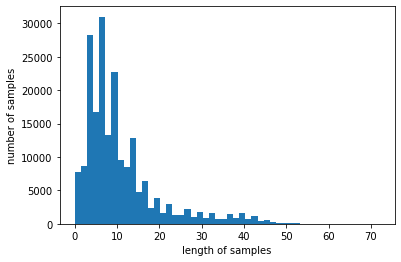

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('안성기', 0.8814025521278381), ('한석규', 0.8699389696121216), ('유다인', 0.8622643947601318), ('이민호', 0.8555809259414673), ('서영희', 0.8524737358093262), ('조재현', 0.8479924201965332), ('김수현', 0.8450777530670166), ('박중훈', 0.8402824401855469), ('류덕환', 0.8400916457176208), ('크리스찬', 0.838569700717926)]


In [ ]:
print(model.wv.most_similar("히어로"))

[('무협', 0.8786229491233826), ('슬래셔', 0.8620060682296753), ('호러', 0.8512345552444458), ('느와르', 0.8457552194595337), ('정통', 0.8351789712905884), ('무비', 0.828278660774231), ('멜로', 0.823951005935669), ('블록버스터', 0.8225955963134766), ('물의', 0.8208442330360413), ('헐리우드', 0.8177660703659058)]


## 사전 훈련된 워드 임베딩
- 구글 드라이브에 ko.bin 파일 업로드 필요
- https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view?resourcekey=0-Dq9yyzwZxAqT3J02qvnFwg 

In [ ]:
import gensim
model = gensim.models.Word2Vec.load('./ko.bin')

In [ ]:
!pwd

/content


In [ ]:
ls

ko.bin  ratings.txt  sample_data/  w2v


In [ ]:
result = model.wv.most_similar("강아지")
print(result)

[('고양이', 0.7290452718734741), ('거위', 0.7185635566711426), ('토끼', 0.7056223154067993), ('멧돼지', 0.6950401067733765), ('엄마', 0.6934334635734558), ('난쟁이', 0.6806551218032837), ('한마리', 0.6770296096801758), ('아가씨', 0.6750352382659912), ('아빠', 0.6729634404182434), ('목걸이', 0.6512460708618164)]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']

y_train = [1, 0, 0, 1, 1, 0, 1]  # 긍정 1 부정 0

In [ ]:
# 토큰화 
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

16


In [ ]:
# 인코딩 
x_encoded = t.texts_to_sequences(sentences)
print(x_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [ ]:
max_len = max(len(l) for l in x_encoded)
print(max_len)

4


In [ ]:
# Padding
x_train = pad_sequences(x_encoded, maxlen=max_len, padding= 'post')
y_train = np.array(y_train)
print(x_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(vocab_size, 4, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 4)              64        
_________________________________________________________________
flatten_2 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6863 - acc: 0.7143
Epoch 2/100
1/1 - 0s - loss: 0.6847 - acc: 0.7143
Epoch 3/100
1/1 - 0s - loss: 0.6830 - acc: 0.7143
Epoch 4/100
1/1 - 0s - loss: 0.6813 - acc: 0.7143
Epoch 5/100
1/1 - 0s - loss: 0.6797 - acc: 0.7143
Epoch 6/100
1/1 - 0s - loss: 0.6780 - acc: 0.7143
Epoch 7/100
1/1 - 0s - loss: 0.6764 - acc: 0.7143
Epoch 8/100
1/1 - 0s - loss: 0.6747 - acc: 0.8571
Epoch 9/100
1/1 - 0s - loss: 0.6731 - acc: 0.8571
Epoch 10/100
1/1 - 0s - loss: 0.6714 - acc: 0.8571
Epoch 11/100
1/1 - 0s - loss: 0.6697 - acc: 0.8571
Epoch 12/100
1/1 - 0s - loss: 0.6680 - acc: 0.8571
Epoch 13/100
1/1 - 0s - loss: 0.6663 - acc: 0.8571
Epoch 14/100
1/1 - 0s - loss: 0.6647 - acc: 0.8571
Epoch 15/100
1/1 - 0s - loss: 0.6630 - acc: 1.0000
Epoch 16/100
1/1 - 0s - loss: 0.6613 - acc: 1.0000
Epoch 17/100
1/1 - 0s - loss: 0.6596 - acc: 1.0000
Epoch 18/100
1/1 - 0s - loss: 0.6579 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.6561 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.6544 - a

# 과제
1. TF-IDF -> word2vec / pretrained Word2Vec 
2. 모델 (머신러닝 or 오늘 배운 모델)
3. 성능평가 